Di bawah ini adalah library yang digunakan untuk preprocessing dataset.

In [45]:
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords,PorterStemmer
from nltk.tokenize import casual_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import brown
import numpy as np
from sklearn.preprocessing import OneHotEncoder

Load data dari all-data.csv ke Pandas DataFrame. Lalu, memisahkan data menjadi x_data (text) dan y_data (target).

In [46]:
dataset = pd.read_csv("all-data.csv",
                      encoding="ISO-8859-1",
                      names=["target","text"])  
X_data = dataset['text'].values
y_data = dataset['target'].values

Melakukan preprocessing dataset berupa:

- Mengubah semua huruf menjadi huruf kecil
- Menghilangkan karakter-karakter spesial
- Menghilangkan huruf sama yang berurutan
- Menghilangkan kata yang terdiri dari 1 huruf

In [47]:
data_dummy = dataset.copy()
X_dummy = data_dummy['text']
y_clean = data_dummy['target']

# Convert to Lower Case
X_dummy = X_dummy.str.lower()
# Replace Number
X_dummy = X_dummy.str.replace("(\d+)[^ ]*",' ')
# Replace URL
X_dummy = X_dummy.str.replace("(http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*",' ')
# Replace Tag
X_dummy = X_dummy.str.replace("@[^ ]*",' ')
# Replace ' to nothing
X_dummy = X_dummy.str.replace("'",'')
# Remove Punctuation
X_dummy = X_dummy.str.replace('[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]',' ')
# Replace 3+ Consecutive Letter with only 2
X_dummy = X_dummy.str.replace("(.)\\1\\1+",'\\1\\1')
# Remove Independent words with length 1
X_dummy = X_dummy.str.replace("(^| ).( |$)",' ')

X_dummy[0:10]

0    according to gran  the company has no plans to...
1    technopolis plans to develop in stages an area...
2    the international electronic industry company ...
3    with the new production plant the company woul...
4    according to the company updated strategy for ...
5    financing of aspocomp growth aspocomp is aggre...
6    for the last quarter of  componenta net sales ...
7    in the third quarter of  net sales increased b...
8    operating profit rose to eur  mn from eur  mn ...
9    operating profit totalled eur  mn  up from eur...
Name: text, dtype: object

Melakukan preprocessing berupa:

- Tokenization
- Stop words removal
- Stemming

In [48]:
X_clean = []
for sentence in X_dummy:
    # sentence = str(TextBlob(sentence).correct())
    tokenized = casual_tokenize(sentence)
    new_tokenized = ""
    for word in tokenized:
        #Remove Stopword
        word = remove_stopwords(word)
        if word == '':
            continue
        #Stemming
        stemmer = SnowballStemmer('english')
        word = stemmer.stem(word) 
        new_tokenized += (word + ' ')
    X_clean.append(new_tokenized.lstrip())

X_clean[0]

'accord gran compani plan product russia compani grow '

Menggunakan train_test_split dari sklearn untuk memisahkan dataset menjadi training dataset (70%) dan test dataset (30%).

In [49]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,test_size=0.3,random_state=101)
print(np.array(X_train).shape)
print(np.array(X_test).shape)

(3392,)
(1454,)


Menggunakan TfidfVectorizer dari sklearn untuk mengubah data berupa kalimat menjadi vector berisi nilai TF-IDF dari tiap kata agar bisa digunakan sebagai input dalam learning model.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2))
vect.fit(X_clean)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

Dibawah ini adalah library yang digunakan untuk training dan testing data.

In [61]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,BaseDiscreteNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Yang pertama kita akan mencoba traning data menggunakan model Logistic Regression. Setelah di testing, akurasi dan Confusion Matrix nya sebagai berikut.

Accuracy :  0.7001375515818432


Text(33.0, 0.5, 'Predict')

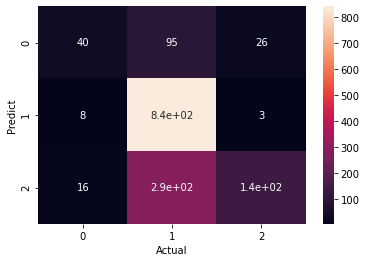

In [64]:
model = LogisticRegression(n_jobs=None,max_iter=1000)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy : ',accuracy)
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')

Yang kedua kita akan mencoba traning data menggunakan model K-Nearest Neighbors. Setelah di testing, akurasi dan Confusion Matrix nya sebagai berikut.

Accuracy :  0.6169188445667125


Text(33.0, 0.5, 'Predict')

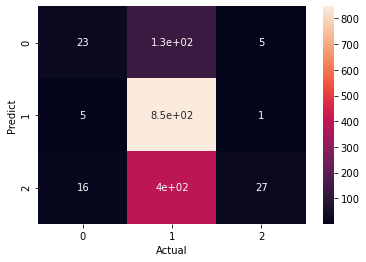

In [65]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy : ',accuracy)
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')

Yang ketiga kita akan mencoba traning data menggunakan model Multinominal Naive Bayes.Setelah di testing, akurasi dan Confusion Matrix nya sebagai berikut.

Accuracy :  0.6678129298486932


Text(33.0, 0.5, 'Predict')

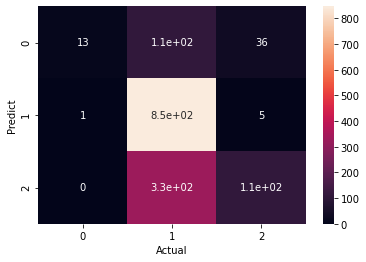

In [66]:
model = MultinomialNB()  
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy : ',accuracy)
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')

Yang keempat kita akan mencoba traning data menggunakan model Bernoulli Naive Bayes. Setelah di testing, akurasi dan Confusion Matrix nya sebagai berikut.

Accuracy :  0.6313617606602476


Text(33.0, 0.5, 'Predict')

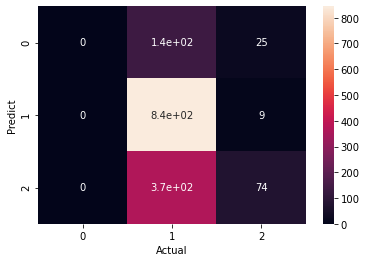

In [67]:
model = BernoulliNB()  
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy : ',accuracy)
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')

Yang terakhir kita akan mencoba traning data menggunakan model Linear Support Vector Classifier. 

Accuracy :  0.7441540577716643


Text(33.0, 0.5, 'Predict')

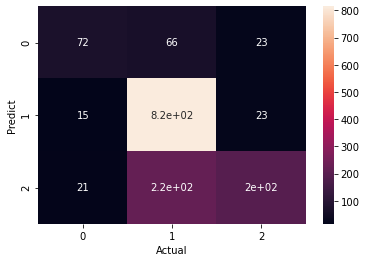

In [68]:
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy : ',accuracy)
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')